In [1]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dfmg = pd.read_csv("dfmg.csv")

In [2]:
grndLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp")

In [4]:
list(grndLine.geometry[0].exterior.coords)

[(180.0, -84.3563),
 (180.0, -90.0),
 (0.0, -90.0),
 (0.0, -71.4927),
 (0.004944, -71.4916),
 (0.012007, -71.4916),
 (0.015538, -71.4904),
 (0.015537, -71.4893),
 (0.0226, -71.4893),
 (0.022598, -71.4883),
 (0.033189, -71.4871),
 (0.033187, -71.4859),
 (0.036718, -71.4859),
 (0.036711, -71.4826),
 (0.040241, -71.4826),
 (0.040214, -71.4703),
 (0.043741, -71.4703),
 (0.04372, -71.4613),
 (0.047245, -71.4613),
 (0.047231, -71.4557),
 (0.050755, -71.4557),
 (0.050727, -71.4455),
 (0.047202, -71.4445),
 (0.04719, -71.44),
 (0.050712, -71.44),
 (0.050706, -71.4377),
 (0.054223, -71.4366),
 (0.054217, -71.4344),
 (0.057734, -71.4332),
 (0.05773, -71.4321),
 (0.06125, -71.4321),
 (0.061243, -71.4299),
 (0.064759, -71.4287),
 (0.064754, -71.4276),
 (0.068274, -71.4276),
 (0.068261, -71.4243),
 (0.07178, -71.4243),
 (0.071771, -71.422),
 (0.075289, -71.422),
 (0.075285, -71.4209),
 (0.078798, -71.4198),
 (0.078788, -71.4175),
 (0.082305, -71.4175),
 (0.085807, -71.4141),
 (0.089323, -71.4141),


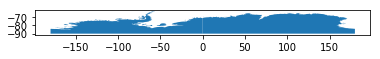

In [8]:
grndLine.plot()
plt.show()

In [3]:
import fiona
shape = fiona.open("/media/data/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp")
shape.crs

{'init': 'epsg:4326'}

In [6]:
grndLine.crs['units']

KeyError: 'units'

In [7]:
import pyproj
wgs84=pyproj.Proj("+init=EPSG:4326")

In [78]:
#point = Point(wgs84(-34, -74))
point = Point(-34, -74)
grndLineWGS84 = grndLine.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})

print(point.distance(grndLine.geometry[1]) * np.pi/180 * 6378.137) 

368.1360631738395


In [27]:
lons = np.array(list(grndLine.geometry[1].exterior.coords))[:,0]
lats = np.array(list(grndLine.geometry[1].exterior.coords))[:,1]

In [34]:
np.array(wgs84(lons,lats))

(2, 129915)

In [75]:
points = np.array([[-74., -34.],
       [-75.282 , -31.1238],
       [-75.2417, -30.8864],
       [-75.2161, -31.0024],
       [-75.0563, -30.9177],
       [-75.0551, -30.923 ]])

In [76]:
pointsx = wgs84(points[:,1], points[:,0])[0]
pointsy = wgs84(points[:,1], points[:,0])[1]
shapex = wgs84(lons,lats)[0]
shapey = wgs84(lons, lats)[1]

In [56]:
np.array([x,y])

array([[-0.54284452, -0.54321279, -0.53906937, -0.54109396, -0.53961566,
        -0.53970816],
       [-1.31386117, -1.31391877, -1.3132154 , -1.3127686 , -1.30997956,
        -1.30995862]])

In [77]:
from scipy.spatial.distance import cdist

dist = cdist(np.array([pointsx, pointsy]).T, np.array([shapex, shapey]).T) * 6378.137
dist[0].min()

368.13606317383875

In [31]:
from haversine import haversine
import pyproj
wgs84=pyproj.Proj("+init=EPSG:4326")

def dist_min(pointslon, pointslat, lons, lats):
    #ensure points is in lon,lat format
    if(len(lons) != len(lats)):
        raise ValueError('lons and lats must be equal len')
    min_distance = np.zeros(len(points))
    distance = np.zeros(len(lons))
    
    points = wgs84(pointslon, pointslat)
    pointsx = points[0]
    pointsy = points[1]
    
    shape = wgs84(lons, lats)
    shapex = shape[0]
    shapey = shape[1]

In [30]:
dist_min([-74,-34], lons, lats)

299.31317334567996

In [116]:
gs = gpd.GeoSeries([Point(-34, -74), Point((-35, -74)), Point((-36, -74))])
gs.crs = {'init':'4326'}

In [120]:
gs[0].distance(grndLine.geometry[1]) * np.pi/180 * 6371.

367.72412672862487

In [124]:
d = grndLine.geometry[:].distance(gs[0])  * np.pi/180 * 6371.
d.min()

367.72412672862487

In [126]:
len(gs)

3

In [99]:
pointsList = []
for i in range(len(points)):
    pointsList.append(Point(points[i, ::-1]))
    print(Point(points[i, ::-1]))

POINT (-34 -74)
POINT (-31.1238 -75.282)
POINT (-30.8864 -75.24169999999999)
POINT (-31.0024 -75.2161)
POINT (-30.9177 -75.05629999999999)
POINT (-30.923 -75.0551)


In [115]:
gpd.GeoSeries(pointsList).distance(grndLine.geometry[1]) * np.pi/180 * 6371.

0    367.724127
1    177.650220
2    171.514620
3    178.748651
4    192.172183
5    192.481472
dtype: float64

In [11]:
unique_points = dfmg.loc[:,"LATITUDE": "LONGITUDE"].drop_duplicates(subset=['LONGITUDE', 'LATITUDE']).values
unique_points = unique_points[:,::-1]
shp_up = [Point(unique_points[0])]*len(unique_points)
for i in range(len(unique_points)):
    shp_up[i] = Point(unique_points[i])

NameError: name 'dfmg' is not defined

In [12]:
gs = gpd.GeoSeries(shp_up)
gs.crs = {'init': 'epsg:4326'}

NameError: name 'shp_up' is not defined

In [13]:
gs.distance(grndLine.cx[:,:].geometry[1])

0    3.307023
1    3.533025
2    3.841336
dtype: float64